In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm, ticker

In [2]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [3]:
jpeg_cha = pd.read_csv("../measurements/jpeg_sparsity/characteristic.csv")
# reg_cha = pd.read_csv("../measurements/regression_snr_cha/characteristic.csv")
# decom_cha = pd.read_csv("../measurements/decomposition_snr_cha/characteristic.csv")

In [4]:
jpeg_cha = jpeg_cha[jpeg_cha["sparsity"]>0]
# decom_cha = decom_cha[decom_cha["sparsity"]>0]
# reg_cha = reg_cha[reg_cha["sparsity"]>0]

jpeg_cha = jpeg_cha[jpeg_cha["datasize_est"]>0]
# decom_cha = decom_cha[decom_cha["datasize_est"]>0]
# reg_cha = reg_cha[reg_cha["datasize_est"]>0]

In [5]:
tensor_size = 128*26*26 *4
jpeg_cha["ratio"] = tensor_size/jpeg_cha["datasize_est"]
# decom_cha["ratio"] = tensor_size/decom_cha["datasize_est"]
# reg_cha["ratio"] = tensor_size/reg_cha["datasize_est"]

In [6]:
sparsity = [ 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
quality = [60,70,80,90,100]

x=[]
y=[]
z=[]
z_std=[]
cha_df_group =jpeg_cha.groupby("target_sparsity")
for p in sparsity:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(q)
        y.append(p)
        z.append(cha_plot_df["ratio"].mean())
        z_std.append(cha_plot_df["ratio"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
z_std = np.array(z_std)
X, Y = np.meshgrid( quality,sparsity)
Z = z.reshape(Y.shape)
Z_std = z_std.reshape(Y.shape)

In [8]:
Y

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3, 0.3],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.6, 0.6, 0.6, 0.6, 0.6],
       [0.7, 0.7, 0.7, 0.7, 0.7],
       [0.8, 0.8, 0.8, 0.8, 0.8],
       [0.9, 0.9, 0.9, 0.9, 0.9]])

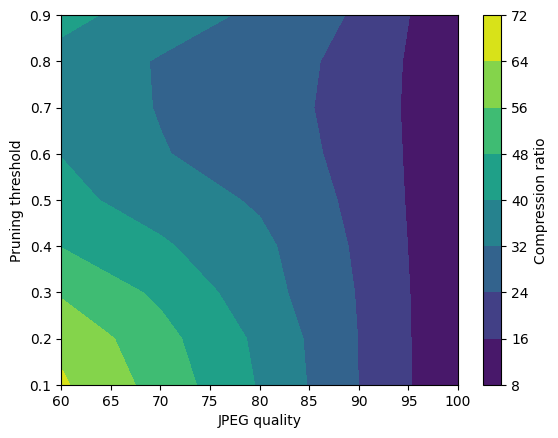

In [7]:

plt.figure()
plt.contourf(X, Y, Z)
plt.xlabel("JPEG quality")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Compression ratio")


In [20]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [1,2,3,4,5]

x=[]
y=[]
z=[]
# z_std=[]
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(q)
        y.append(p)
        z.append(cha_plot_df["ratio"].mean())
        # if cha_plot_df["ratio"].mean()< 5000:
        #     z.append(cha_plot_df["ratio"].mean())
        # else:
        #     z.append(np.nan)
        # z_std.append(cha_plot_df["ratio"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
# z_std = np.array(z_std)
X, Y = np.meshgrid( quality,pruning)
Z = z.reshape(Y.shape)
# Z_std = z_std.reshape(Y.shape)


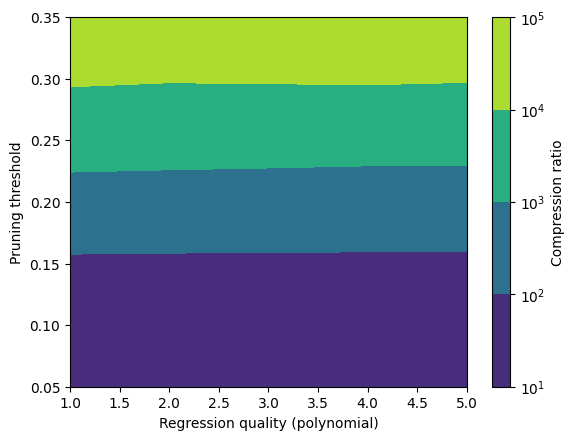

In [21]:
plt.figure()
plt.contourf(X, Y, Z,locator=ticker.LogLocator())
plt.xlabel("Regression quality (polynomial)")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Compression ratio")

In [29]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
# pruning = [0.05, 0.1, 0.15,0.2,0.25]
quality = [2,4,6,8,10]

x=[]
y=[]
z=[]
# z_std=[]
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(q)
        y.append(p)
        z.append(cha_plot_df["ratio"].mean())
        # if cha_plot_df["ratio"].mean()< 1500:
        #     z.append(cha_plot_df["ratio"].mean())
        # else:
        #     z.append(np.nan)
        # z_std.append(cha_plot_df["ratio"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
z_std = np.array(z_std)
X, Y = np.meshgrid( quality,pruning)
Z = z.reshape(Y.shape)
# Z_std = z_std.reshape(Y.shape)

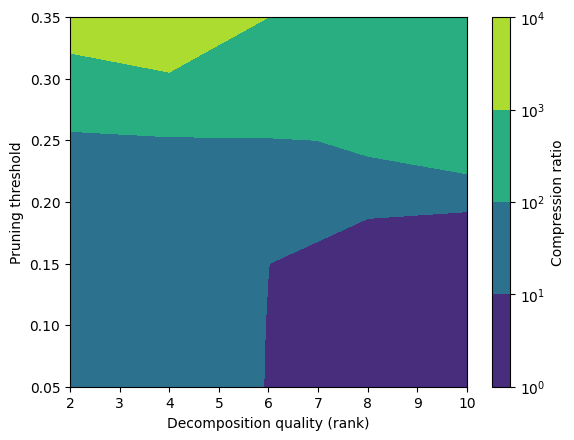

In [30]:
plt.figure()
plt.contourf(X, Y, Z,locator=ticker.LogLocator())
plt.xlabel("Decomposition quality (rank)")
plt.ylabel("Pruning threshold")

plt.colorbar(label="Compression ratio")